# Arrays + Pointers

(chapter 6)

## One Dimensional Arrays

```c
#define N 100

int a[N]; /* space for a[0], ..., a[99] is allocated */

for (i = 0; i < N; ++i)
    sum += a[i]; /* process element a[ i ] */
```

```c
float f[5] = {0.0, 1.0, 2.0, 3.0, 4.0};

int a[100] = {0};

int a[] = {2, 3, 5, -7};

char s[] = “abc”;

char s[] = {"a", "b", "c", "\0"};

```

# Pointers

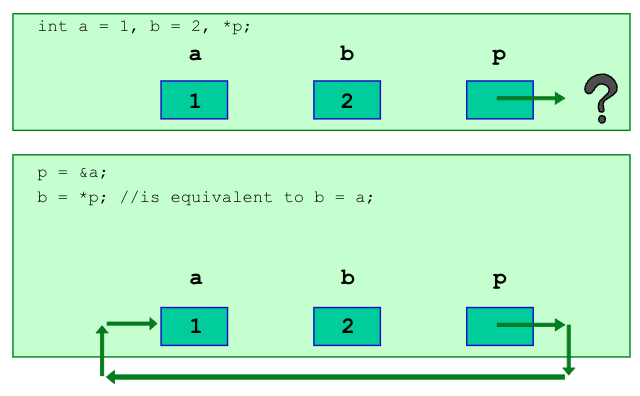

## Why are they important?

* Call by reference
* Efficient argument passing to functions
* String handling
* Dynamic memory allocation
* Efficient memory manipulation


## Example 1

```c
#include <stdio.h>

int main(void)
{
    int i = 7, *p;
    p = &i;
    printf("%s%d\n%s%p\n", "Value of i : ", *p, "Location of i : ", p);
    return 0;
}
```



In [ ]:
# @title
%%writefile location.c
#include <stdio.h>

int main(void)
{
    int i = 7, *p;
    p = &i;
    printf("%s%d\n%s%p\n", "Value of i : ", *p, "Location of i : ", p);
    return 0;
}

In [ ]:
# @title
!gcc location.c -o location && ./location

## Example 2
What will happen ?
```c
*p = 2;
```



In [ ]:
# @title
%%writefile tmp.c

#include <stdio.h>

int main(void)
{
    int a = 1, b = 2, *p;
    p = &a;
    b = *p;

    *p = 2;
    printf("%s%d %s%d\n", "Value of a : ", a, "Value of b : ", b);
    return 0;
}

In [ ]:
# @title
!gcc tmp.c -o tmp
!./tmp

## Declarations and Initializations

```c
int     i = 3, j = 5, *p = &i, *q = &j, *r;
double  x;
```

| Expression                | Equivalent Expression              | Value    |
|---------------------------|------------------------------------|----------|
| `p == &i`                 | `p == ( &i )`                     | 1        |
| `**&p`                    | `* ( * ( &p ) )`                  | 3        |
| `r = &x`                  | `r = ( & x )`                     | illegal  |
| `7 * *p / *q + 7`         | `((( 7 * ( *p ) )) / ( *q )) + 7` | 11       |
| `*( r = &j ) *= *p`       | `( *( r = ( &j ) ) ) *= ( *p )`   | 15       |


Explanation of Selected Expressions
- `p == &i`: Checks if `p` points to the address of `i`.
- `**&p`: Dereferences twice through `p`'s address, effectively accessing the value of the variable `p` points to.
- `r = &x`: Attempts to assign `r` to the address of `x`, but is labeled "illegal" due to the expression’s context or constraints.
- `7 * *p / *q + 7`: Combines dereferencing and arithmetic.
- `*( r = &j ) *= *p`: Assigns `r` to point to `j`, then multiplies `j`'s value by `*p`.

```c
p = 0;

p = NULL; /* equivalent to p = 0 */

p = &i;

p = (int *) 1776; /* an absolute address in memory,
                    This is a risky practice unless you’re managing memory directly or
                    working in low-level hardware contexts*/
```

**Declaration**

```c
int *p;
float *q;
void *v;
```

| **Legal Assignment**   | **Illegal Assignment** |
|-------------------------|-------------------------|
| `p = 0;`               | `p = 1;`               |
| `p = (int *) 1;`       | `v = 1;`               |
| `p = v = q;`           | `p = q;`               |
| `p = (int *) q;`       |                         |


**More illegal**
```c
&3,
&(k + 99),
```


## Call by reference

```c
void swap(int *p, int *q) /* Define pointers as params */
{
    int tmp;
    tmp = *p; /* Use dereferenced values */
    *p = *q;
    *q = tmp;
}

int main(void)
{
    int i = 3, j = 5;
    swap(&i, &j); /* Pass addresses as arguments */
    printf("%d%d\n", i, j);
    return 0;
}
```

In [ ]:
# @title
%%writefile swap.c
# include <stdio.h>
void swap(int *p, int *q) /* Define pointers as params */
{
    int tmp;
    tmp = *p; /* Use dereferenced values */
    *p = *q;
    *q = tmp;
}

int main(void)
{
    int i = 3, j = 5;
    swap(&i, &j); /* Pass addresses as arguments */
    printf("%d %d\n", i, j);
    return 0;
}

In [ ]:
# @title
!gcc swap.c -o swap && ./swap

## Pointer Arithmetic


* `p+1`: address of next element of the same type
* `p-1`: address of previous element of the same type
* `p-q`: number of elements between p and q.




## Pointer Arithmetic and Element Size

```c
double a[2], *p = NULL, *q = NULL;

p = a; /* points to the base of the array */

q = p + 1; /* equivalent to q = &a[ 1 ] */

printf("%d\n", q - p); /* 1 is printed */

printf("%d\n", (char*)q - (char*)p); /* sizeof(double)==8 is printed */
```


In [ ]:
# @title
%%writefile pointer-arith.c

#include <stdio.h>

int main(void) {
    double a[2];
    double *p = NULL, *q = NULL;

    p = a;       // Pointer p now points to the start of array a
    q = p + 1;   // Pointer q points to the next element in array a

    // Printing the difference between pointers in terms of elements
    printf("Difference in elements: %td\n", q - p);

    // Printing the difference in memory address in bytes
    printf("Difference in bytes: %ld\n", (char*)q - (char*)p);

    return 0;
}


In [ ]:
# @title
!gcc pointer-arith.c -o pointer-arith && ./pointer-arith

# Arrays and Pointers

An array name is an address!

```c
a[i] is equivalent to *(a + i)

p[i] is equivalent to *(p + i)
```
Pointer arithmetic ~ array indexing

Both equivalent:

<table> <tr> <td>

```c
for ( p = a; p < &a[ N ]; ++p )     
    sum += *p;     
```

</td> <td>

```c
for ( i = 0; i <  N; ++i )     
    sum += a[i];   
```

</td> </tr> </table>

## Illegal expressions !!!

```c
a = p
++a
a += 2
&a
```

The main difference between the two: a pointer can be modified, an array cannot, it is a CONSTANT pointer!




## Passing an array to a function 1

```c
double sum(double a[], int n)
{
	int          i = 0;
	double   sum = 0.0;

	for ( i = 0; i < n; ++i )
	      sum += a[i];
	return sum;
}
```

* Base address is passed call by value
* Array is not copied!
* double *a is an equivalent form

What will `sum(a+3, 3)` compute?


## Passing an array to a function 2


```c

/* Merge a[] of size m and b[] of size n  into c[]. */
void merge(int a[], int b[], int c[], int m, int n)
{
    int i = 0, j = 0, k = 0;
    while (i < m && j < n)
    {
        if (a[i] < b[j])
            c[k++] = a[i++];
        else
            c[k++] = b[j++];
    }
    while (i < m)
        c[k++] = a[i++];
    while (j < n)
        c[k++] = b[j++];
}
```

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>

/* Function to merge two sorted arrays into a third array */
void merge(int a[], int b[], int c[], int m, int n);

int main()
{
    int a[] = {1, 3, 5, 7};           /* First sorted array */
    int b[] = {2, 4, 6, 8};           /* Second sorted array */
    int m = sizeof(a) / sizeof(a[0]); /* Number of elements in array a */
    int n = sizeof(b) / sizeof(b[0]); /* Number of elements in array b */

    int c[m + n]; /* Array to hold the merged result */

    /* Call the merge function */
    merge(a, b, c, m, n);

    /* Display the merged array */
    printf("Merged array: ");
    for (int i = 0; i < m + n; i++)
    {
        printf("%d ", c[i]);
    }
    printf("\n");

    return 0;
}

/* Function to merge two sorted arrays */
void merge(int a[], int b[], int c[], int m, int n)
{
    int i = 0, j = 0, k = 0;
    while (i < m && j < n)
    {
        if (a[i] < b[j])
            c[k++] = a[i++];
        else
            c[k++] = b[j++];
    }
    while (i < m)
        c[k++] = a[i++];
    while (j < n)
        c[k++] = b[j++];
}


In [ ]:
# @title
!gcc tmp.c -o tmp
!./tmp

## Count the number of words in a string

```c
#include <ctype.h>
int word_cnt(char *s)
{
	int    cnt = 0;
	while (*s != '\0')
	{
	      while (isspace(*s)) /*skip white spaces */
		      ++s;
	      if (*s != '\0') /*found a word*/
	      {
		      ++cnt;
		      while (!isspace(*s) && *s != '\0') /*skip the word*/
			++s;
	      }
	}
	return cnt;
}
```

# Const

* Type qualifier; comes after storage class
* E.g.: static const int k=3;

* const int *p   =>  p points to a const variable
* int * const p  =>  p is const and cannot be changed
* const int * const p   =>   both.


## static const int

```c
// At file scope:
static const int k = 3;  // Only this file can see k, and k cannot be modified

// Inside a function:
void foo() {
    static const int k = 3;  // k retains value between calls, cannot be modified
    // k = 4;  // Error: cannot modify const variable
}
```

## const int *p

* p points to a constant integer
* The value of the integer cannot be changed through p.


```c
int x = 10;
const int *p = &x;
*p = 20; // Error: Cannot modify a `const` variable through `p`.
```

## int * const p

* p itself is constant; the pointer cannot be changed to point to another variable.
* The value at the address p points to can still be modified.

```c
int x = 10, y = 20;
int * const p = &x;
p = &y;  // Error: Cannot change a constant pointer.
*p = 15; // Allowed: Modifies the value at the address `p` points to.
```

## const int * const p

* Both the pointer and the value it points to are constant.
* You cannot change the pointer or the value it points to.

```c
int x = 10;
const int * const p = &x;
*p = 20; // Error: Cannot modify a `const` variable through `p`.
p = &y;  // Error: Cannot change a constant pointer.
```